In [1]:
import pandas as pd
import numpy as np
fp = "before_encode.csv"
df = pd.read_csv(fp, dtype=str)
df = df.drop('Unnamed: 0',axis = 1)



In [2]:
df.head(5)


,MONTH,DECADE,SIZE_HA,CAUSE,FIRE_TYPE,ECOZONE,duration_days
0,7,2010-2019,1009.5,L,NaN,5,24
1,7,2010-2019,5.2,L,NaN,5,17
2,7,2010-2019,16.5,L,NaN,5,17
3,7,2010-2019,8.7,L,NaN,6,3
4,7,2010-2019,2.6,L,NaN,6,3


In [120]:
df['MONTH'] = df['MONTH'].astype(int)
#ONE HOT CAUSE

one_hot = pd.get_dummies(df['CAUSE'])
one_hot = one_hot.rename(columns = {
    "H" : "cause_H",
    "H-PB": "cause_PB",
    "L": "cause_L",
    "RE": "cause_RE",
    "U": "cause_U"
})
df = df.drop('CAUSE',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['FIRE_TYPE'])
#one_hot.drop('NaN', axis=1, inplace=True) #NaN values encoding
df = df.drop('FIRE_TYPE',axis = 1)
df = df.join(one_hot)

(array([  609.,  1300., 18378., 44212., 41683., 47150., 37475., 11838.,
         4509.,  1618.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

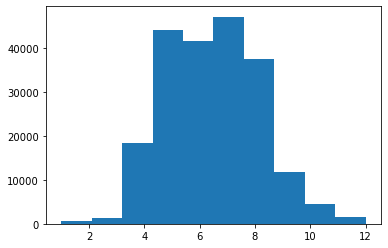

In [121]:
df['SIZE_HA'] = pd.to_numeric(df['SIZE_HA'])

df['SIZE_HA']=df['SIZE_HA'].replace(0,0.000001)
df['SIZE_HA'] = np.log10(df['SIZE_HA']).astype(int)
df = df.rename(columns = {"SIZE_HA" : "SIZE_HA_log"})

set(list(df["SIZE_HA_log"].values))

import matplotlib.pyplot as plt
x = list(df['MONTH'].values)
plt.hist(x)

In [112]:
df.loc[(df.MONTH<9) & (df.MONTH >=7) ,'Summer']='1'
df.loc[(df.MONTH>=9) | (df.MONTH <7) ,'Summer']='0'

df.loc[(df.MONTH<12) & (df.MONTH >=10) ,'Fall']='1'
df.loc[(df.MONTH>=12) | (df.MONTH <10) ,'Fall']='0'

df.loc[(df.MONTH<3) & (df.MONTH >=1) ,'Winter']='1'
df.loc[(df.MONTH>=3) | (df.MONTH <1) ,'Winter']='0'

df.loc[(df.MONTH<6) & (df.MONTH >=4) ,'Spring']='1'
df.loc[(df.MONTH>=6) | (df.MONTH <4) ,'Spring']='0'
df = df.drop('MONTH',axis = 1)



In [80]:
print(sorted(list(set(list(df['SIZE_HA_log'].values)))))

[-6, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]


In [122]:
df.loc[(df.SIZE_HA_log>=-4),'Size>-4']='1'
df.loc[(df.SIZE_HA_log<-4) ,'Size>-4']='0'

df.loc[(df.SIZE_HA_log>=-2),'Size>-2']='1'
df.loc[(df.SIZE_HA_log<-2) ,'Size>-2']='0'


df.loc[(df.SIZE_HA_log>=-1),'Size>-1']='1'
df.loc[(df.SIZE_HA_log<-1) ,'Size>-1']='0'

df.loc[(df.SIZE_HA_log>=0),'Size>0']='1'
df.loc[(df.SIZE_HA_log<0) ,'Size>0']='0'

df.loc[(df.SIZE_HA_log>=1),'Size>1']='1'
df.loc[(df.SIZE_HA_log<1) ,'Size>1']='0'

df.loc[(df.SIZE_HA_log>=2),'Size>2']='1'
df.loc[(df.SIZE_HA_log<2) ,'Size>2']='0'

df.loc[(df.SIZE_HA_log>=3),'Size>3']='1'
df.loc[(df.SIZE_HA_log<3) ,'Size>3']='0'

df.loc[(df.SIZE_HA_log>=4),'Size>4']='1'
df.loc[(df.SIZE_HA_log<4) ,'Size>4']='0'

df.loc[(df.SIZE_HA_log>=5),'Size>5']='1'
df.loc[(df.SIZE_HA_log<5) ,'Size>5']='0'

df.loc[(df.SIZE_HA_log>=6),'Size>6']='1'
df.loc[(df.SIZE_HA_log<6) ,'Size>6']='0'

df = df.drop('SIZE_HA_log',axis = 1)


In [93]:
print(sorted(list(set(list(df['DECADE'].values)))))

['1940-1949', '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2019', '2020-2019', '2020-2029']


In [115]:
df.loc[(df.DECADE>='1940-1949'),'after1940']='1'
df.loc[(df.DECADE<'1940-1949'),'after1940']='0'

df.loc[(df.DECADE>='1950-1959'),'after1950']='1'
df.loc[(df.DECADE<'1950-1959'),'after1950']='0'

df.loc[(df.DECADE>='1960-1969'),'after1960']='1'
df.loc[(df.DECADE<'1960-1969'),'after1960']='0'

df.loc[(df.DECADE>='1970-1979'),'after1970']='1'
df.loc[(df.DECADE<'1970-1979'),'after1970']='0'

df.loc[(df.DECADE>='1980-1989'),'after1980']='1'
df.loc[(df.DECADE<'1980-1989'),'after1980']='0'

df.loc[(df.DECADE>='1990-1999'),'after1990']='1'
df.loc[(df.DECADE<'1990-1999'),'after1990']='0'

df.loc[(df.DECADE>='2000-2009'),'after2000']='1'
df.loc[(df.DECADE<'2000-2009'),'after2000']='0'

df.loc[(df.DECADE>='2010-2019'),'after2010']='1'
df.loc[(df.DECADE<'2010-2019'),'after2010']='0'

df.loc[(df.DECADE>='2020-2029'),'after2020']='1'
df.loc[(df.DECADE<'2020-2029'),'after2020']='0'

df = df.drop('DECADE',axis = 1)



In [123]:
df.head()

,MONTH,DECADE,ECOZONE,duration_days,cause_H,cause_PB,cause_L,cause_RE,cause_U,1,...,Size>-4,Size>-2,Size>-1,Size>0,Size>1,Size>2,Size>3,Size>4,Size>5,Size>6
0,7,2010-2019,5,24,0,0,1,0,0,0,...,1,1,1,1,1,1,1,0,0,0
1,7,2010-2019,5,17,0,0,1,0,0,0,...,1,1,1,1,0,0,0,0,0,0
2,7,2010-2019,5,17,0,0,1,0,0,0,...,1,1,1,1,1,0,0,0,0,0
3,7,2010-2019,6,3,0,0,1,0,0,0,...,1,1,1,1,0,0,0,0,0,0
4,7,2010-2019,6,3,0,0,1,0,0,0,...,1,1,1,1,0,0,0,0,0,0


In [117]:
df.to_csv("correct_encoded.csv")